In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [74]:
data=pd.read_csv('../clean_data/after_clean.csv')
data.head()

,Year,Jurisdiction,Gender,Average scale score
0,2022,National,Male,275.0
1,2022,National,Female,273.0
2,2022,Alabama,Male,265.0
3,2022,Alabama,Female,264.0
4,2022,Alaska,Male,271.0


In [75]:
data['Year'] = data['Year'].astype(str)
data.dtypes

Year                    object
Jurisdiction            object
Gender                  object
Average scale score    float64
dtype: object

In [76]:
# find out teh jurisdiction 
states=data['Jurisdiction'].unique()
print(len(states))
print(states)

51
['National' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho'
 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine'
 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina' 'South Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']


In [77]:
# 5 states as a group for better plotting
states_1 = data['Jurisdiction'].unique()[:5]
states_2 = data['Jurisdiction'].unique()[5:10]
states_3 = data['Jurisdiction'].unique()[10:15]
states_4 = data['Jurisdiction'].unique()[15:20]
states_5 = data['Jurisdiction'].unique()[20:25]
states_6 = data['Jurisdiction'].unique()[25:30]
states_7 = data['Jurisdiction'].unique()[30:35]
states_8 = data['Jurisdiction'].unique()[35:40]
states_9 = data['Jurisdiction'].unique()[40:45]
states_10 = data['Jurisdiction'].unique()[45:]



In [78]:
states_1

array(['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
      dtype=object)

In [79]:
# Pivot the data for plotting
pivot_data = data.pivot_table(index='Year', columns=['Jurisdiction', 'Gender'], values='Average scale score')

In [80]:
pivot_data.to_csv('../clean_data/pivot_data.csv')

In [81]:
pivot_data

Jurisdiction Alabama        Alaska        Arizona        Arkansas         \
Gender        Female   Male Female   Male  Female   Male   Female   Male   
Year                                                                       
2003           261.0  263.0  278.0  280.0   271.0  271.0    267.0  265.0   
2005           264.0  261.0  278.0  280.0   274.0  274.0    273.0  270.0   
2007           265.0  267.0  283.0  282.0   274.0  277.0    274.0  274.0   
2009           269.0  268.0  283.0  283.0   276.0  279.0    277.0  275.0   
2011           269.0  269.0  284.0  283.0   276.0  282.0    278.0  280.0   
2013           269.0  269.0  281.0  282.0   279.0  280.0    278.0  277.0   
2015           267.0  266.0  281.0  280.0   283.0  283.0    275.0  275.0   
2017           267.0  270.0  277.0  277.0   280.0  285.0    273.0  274.0   
2019           270.0  267.0  272.0  277.0   281.0  279.0    276.0  273.0   
2022           264.0  265.0  268.0  271.0   270.0  272.0    266.0  268.0   

Jurisdiction California         ... Virginia        Washington         \
Gender           Female   Male  ...   Female   Male     Female   Male   
Year                            ...                                     
2003              266.0  268.0  ...    280.0  283.0      281.0  282.0   
2005              268.0  269.0  ...    283.0  285.0      285.0  285.0   
2007              270.0  270.0  ...    286.0  289.0      285.0  285.0   
2009              268.0  272.0  ...    285.0  287.0      288.0  290.0   
2011              273.0  273.0  ...    289.0  289.0      288.0  288.0   
2013              275.0  277.0  ...    289.0  288.0      289.0  290.0   
2015              276.0  275.0  ...    287.0  289.0      285.0  287.0   
2017              277.0  277.0  ...    290.0  290.0      288.0  291.0   
2019              277.0  275.0  ...    288.0  287.0      286.0  286.0   
2022              269.0  270.0  ...    278.0  280.0      272.0  279.0   

Jurisdiction West Virginia        Wisconsin        Wyoming         
Gender              Female   Male    Female   Male  Female   Male  
Year                                                               
2003                 271.0  271.0     284.0  284.0   283.0  284.0  
2005                 270.0  268.0     284.0  285.0   281.0  283.0  
2007                 269.0  271.0     284.0  287.0   286.0  288.0  
2009                 270.0  271.0     287.0  289.0   284.0  288.0  
2011                 272.0  274.0     287.0  290.0   285.0  290.0  
2013                 274.0  274.0     289.0  289.0   287.0  290.0  
2015                 271.0  272.0     289.0  289.0   288.0  286.0  
2017                 273.0  273.0     287.0  289.0   289.0  289.0  
2019                 273.0  272.0     289.0  288.0   288.0  285.0  
2022                 260.0  261.0     279.0  283.0   280.0  281.0  

[10 rows x 102 columns]

In [82]:
def plot(sample_states):
    fig, axes = plt.subplots(nrows=1, ncols=len(sample_states), figsize=(5 * len(sample_states), 10), sharey=True)
    fig.suptitle('Average Mathematics Score By Gender Over Time for Selected States', fontsize=16)
    colors=['#C497B2','#14517C']
    y_min,y_max=230,300
# Loop through the states to create horizontal subplots
    for ax, state in zip(axes, sample_states):
        pivot_data[state].plot(ax=ax, marker='o',color=colors)
        ax.set_title(state)
        ax.set_xlabel('Year')
        ax.set_ylabel('Average Scale Score')
        ax.set_ylim(y_min,y_max)
        ax.legend(title='Gender')

# Adjust the layout
    plt.style.use('my_style')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

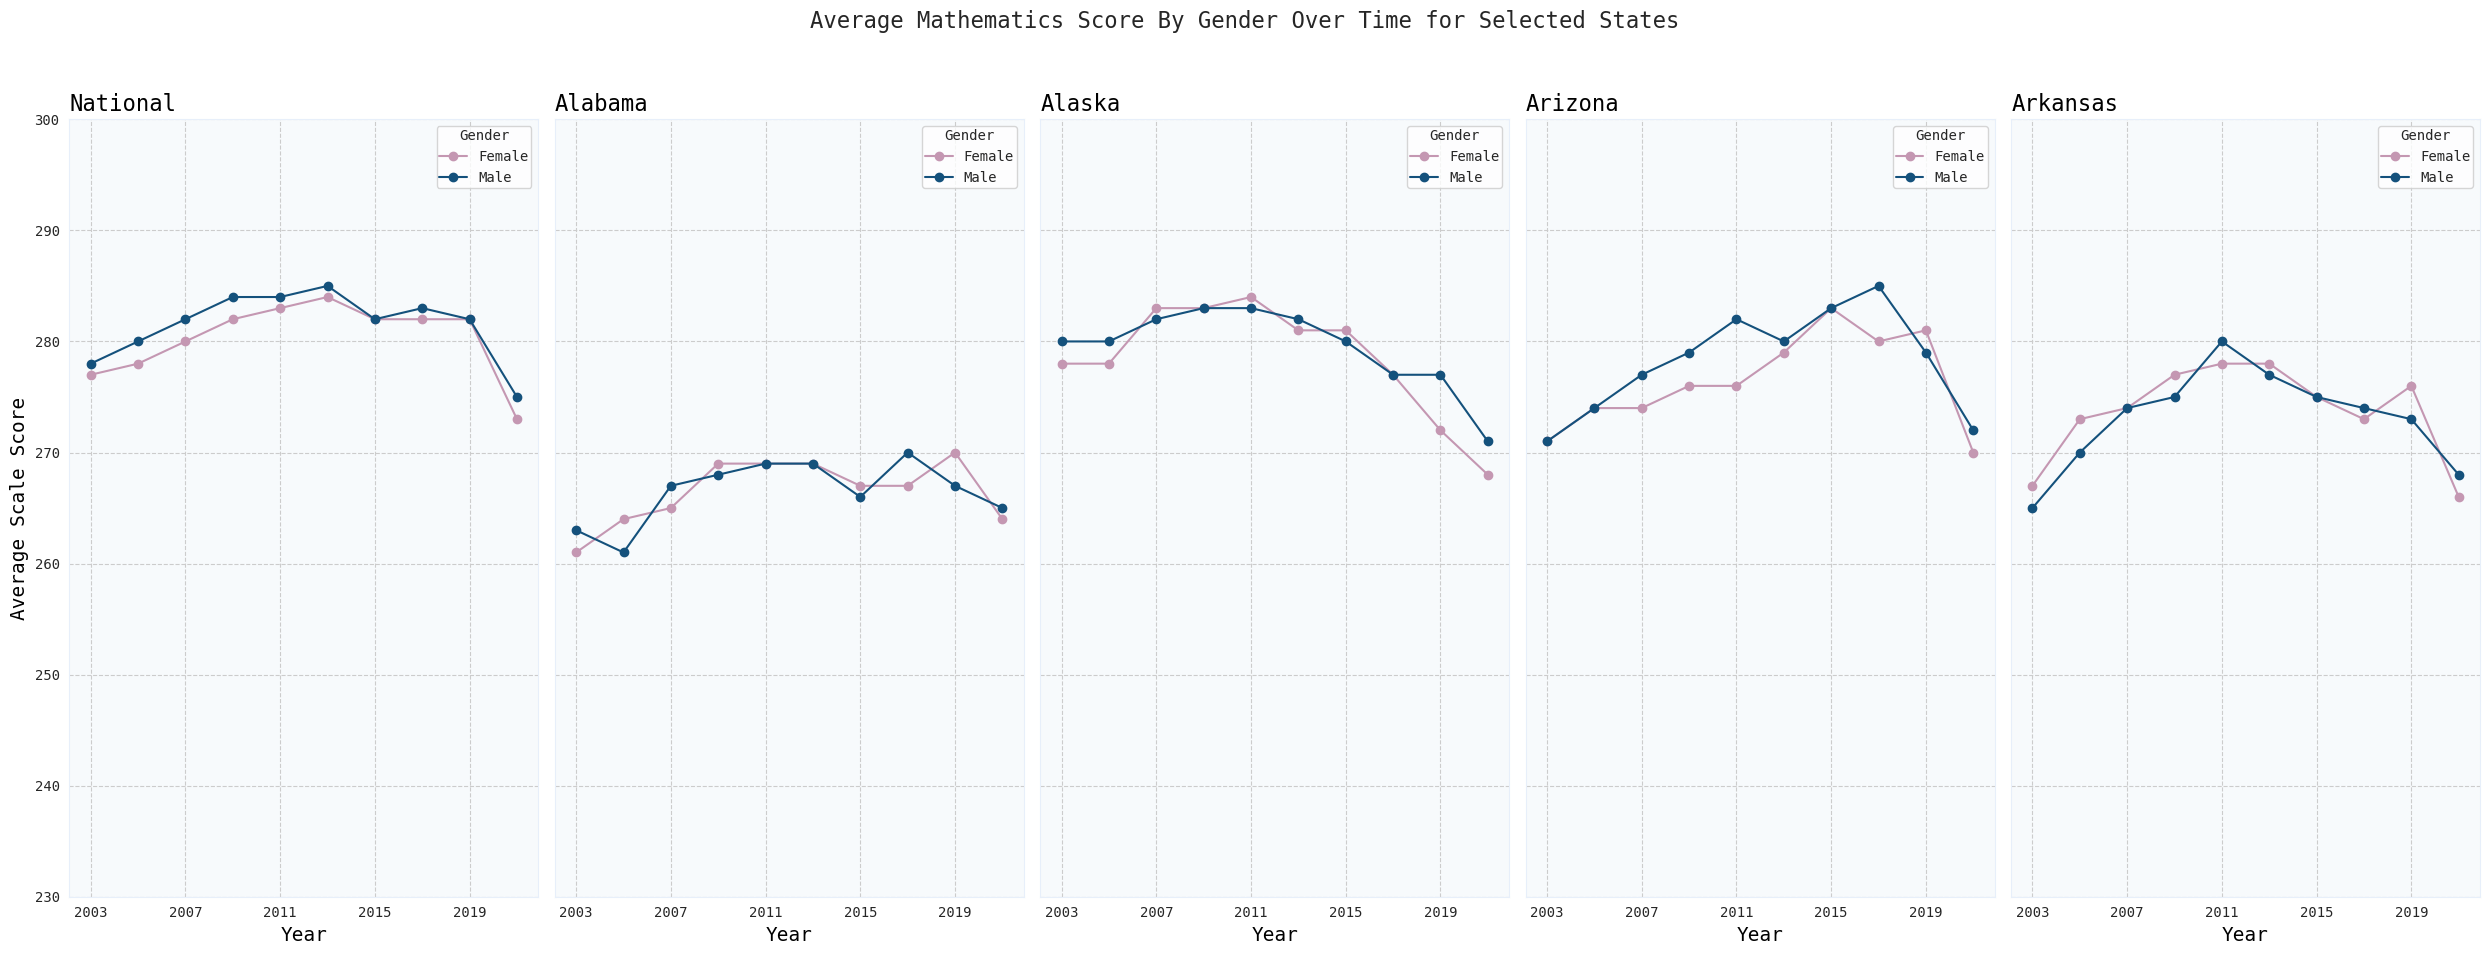

In [83]:
plot(states_1)

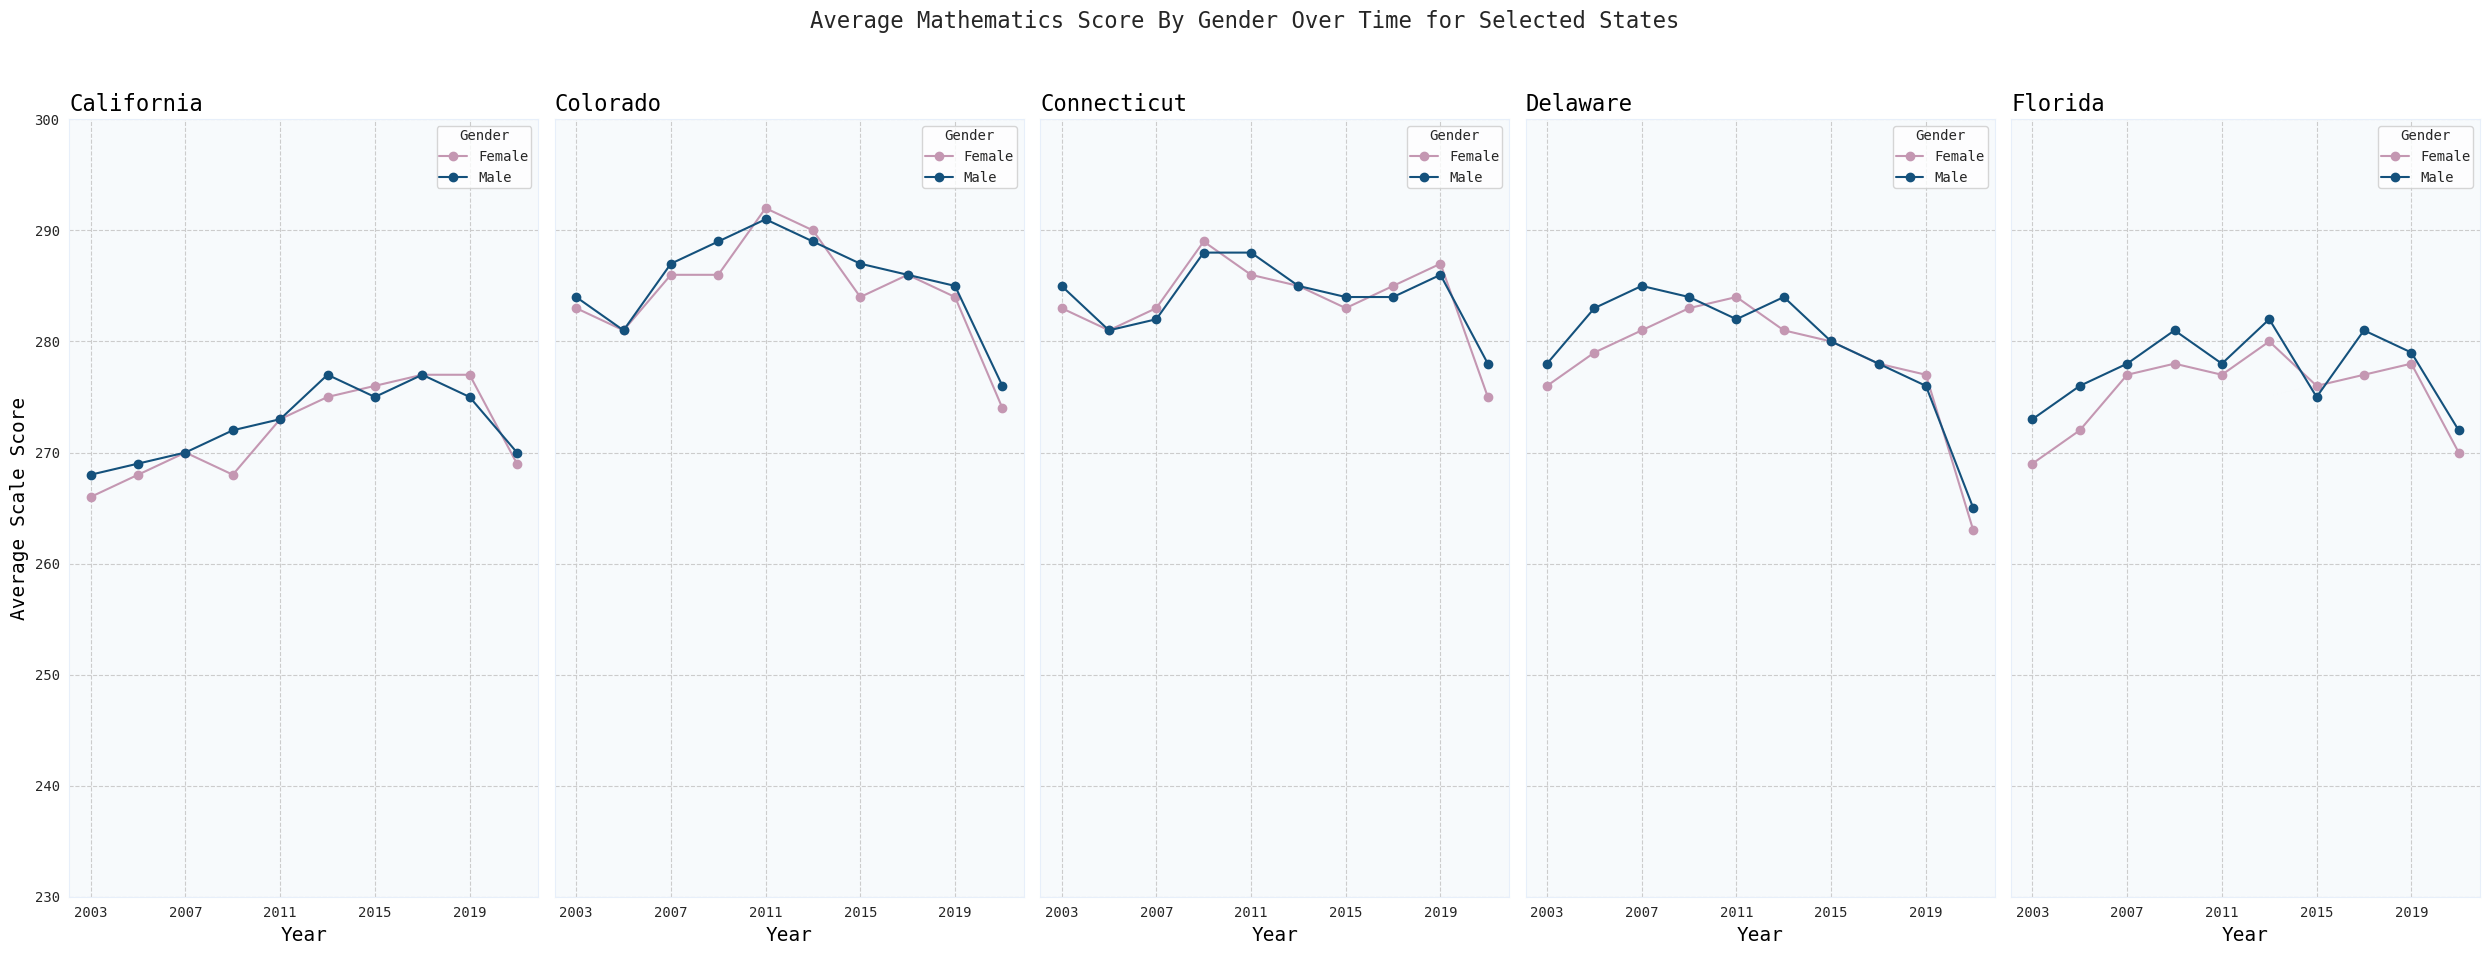

In [84]:
plot(states_2)

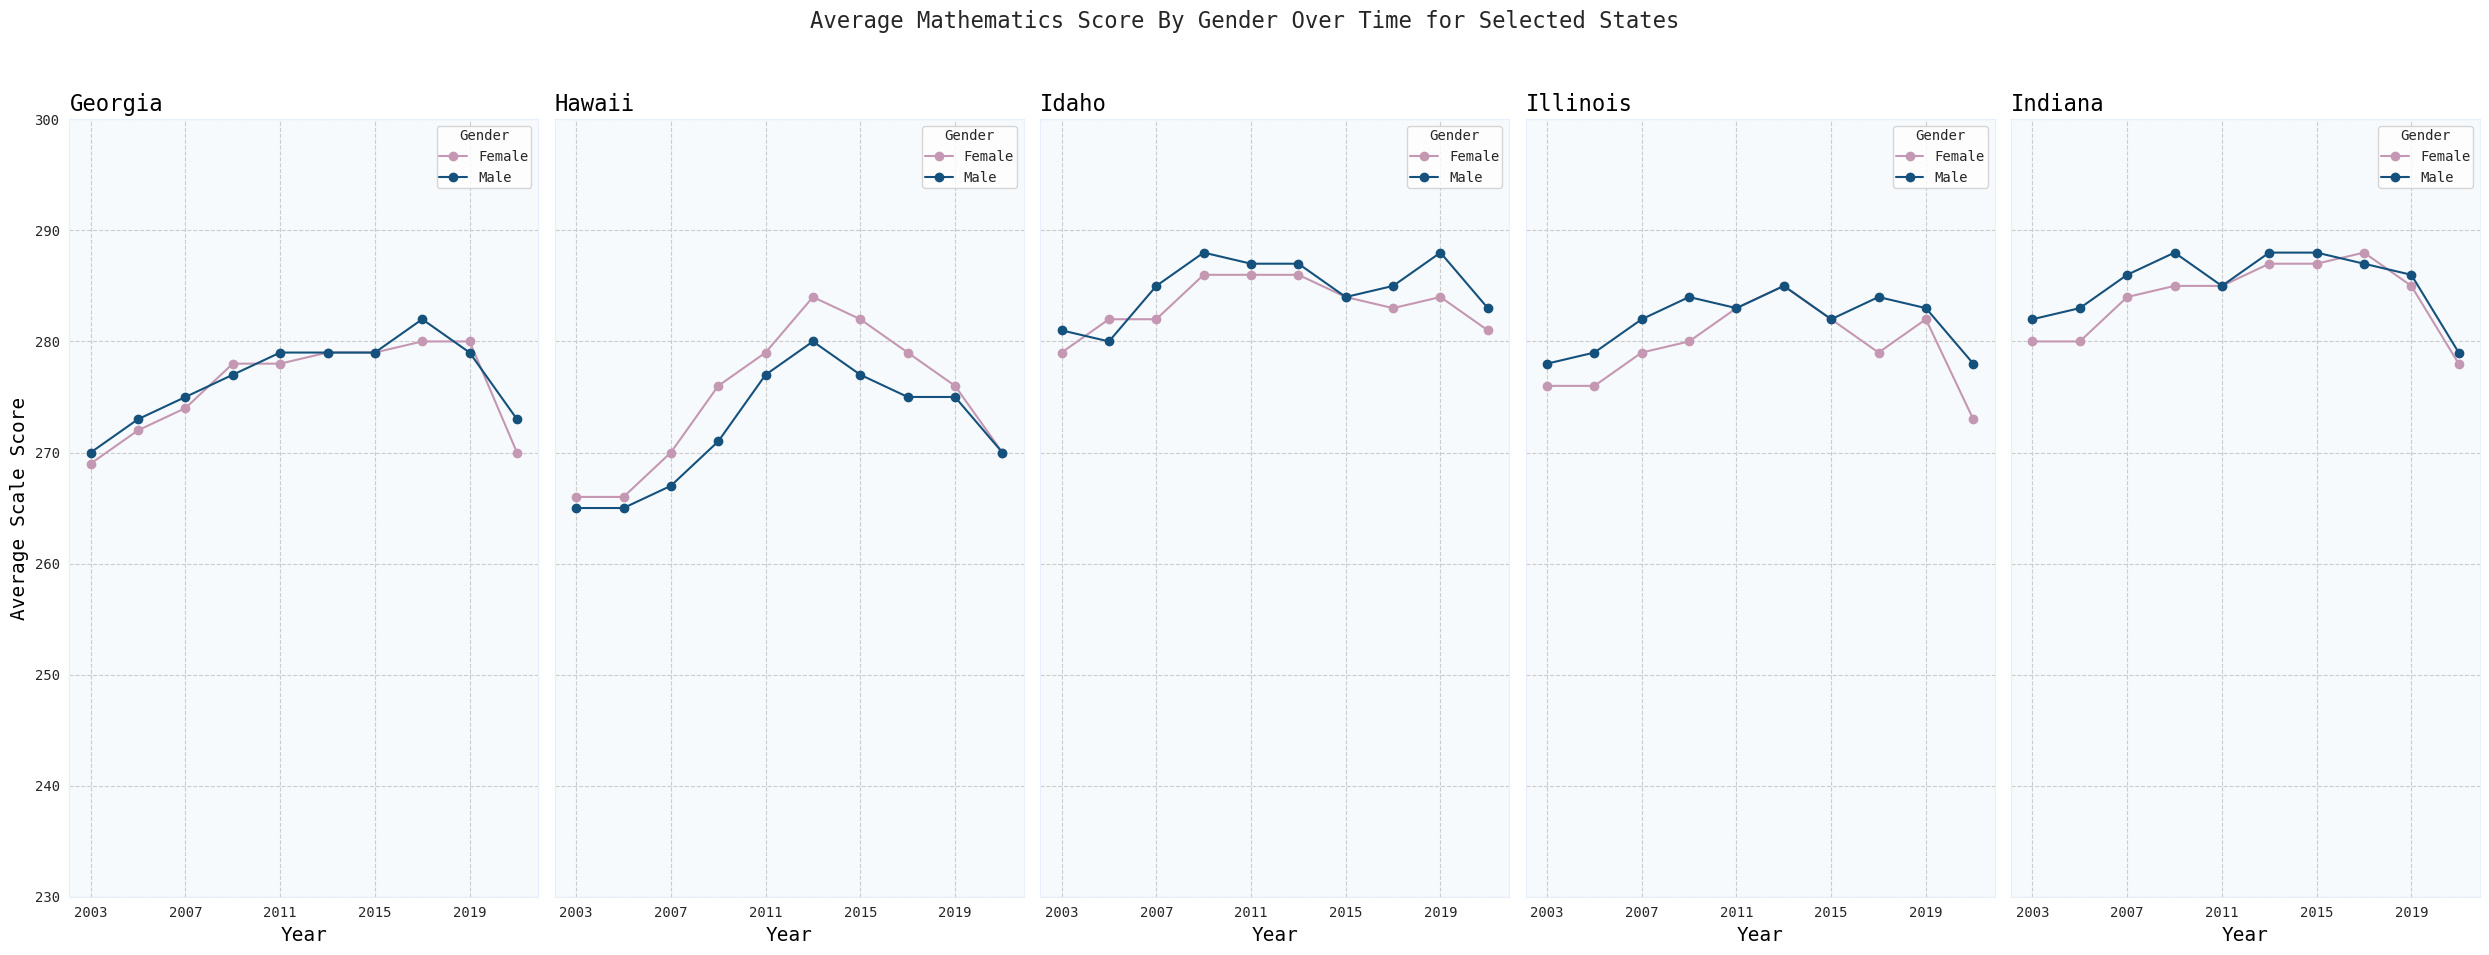

In [85]:
plot(states_3)

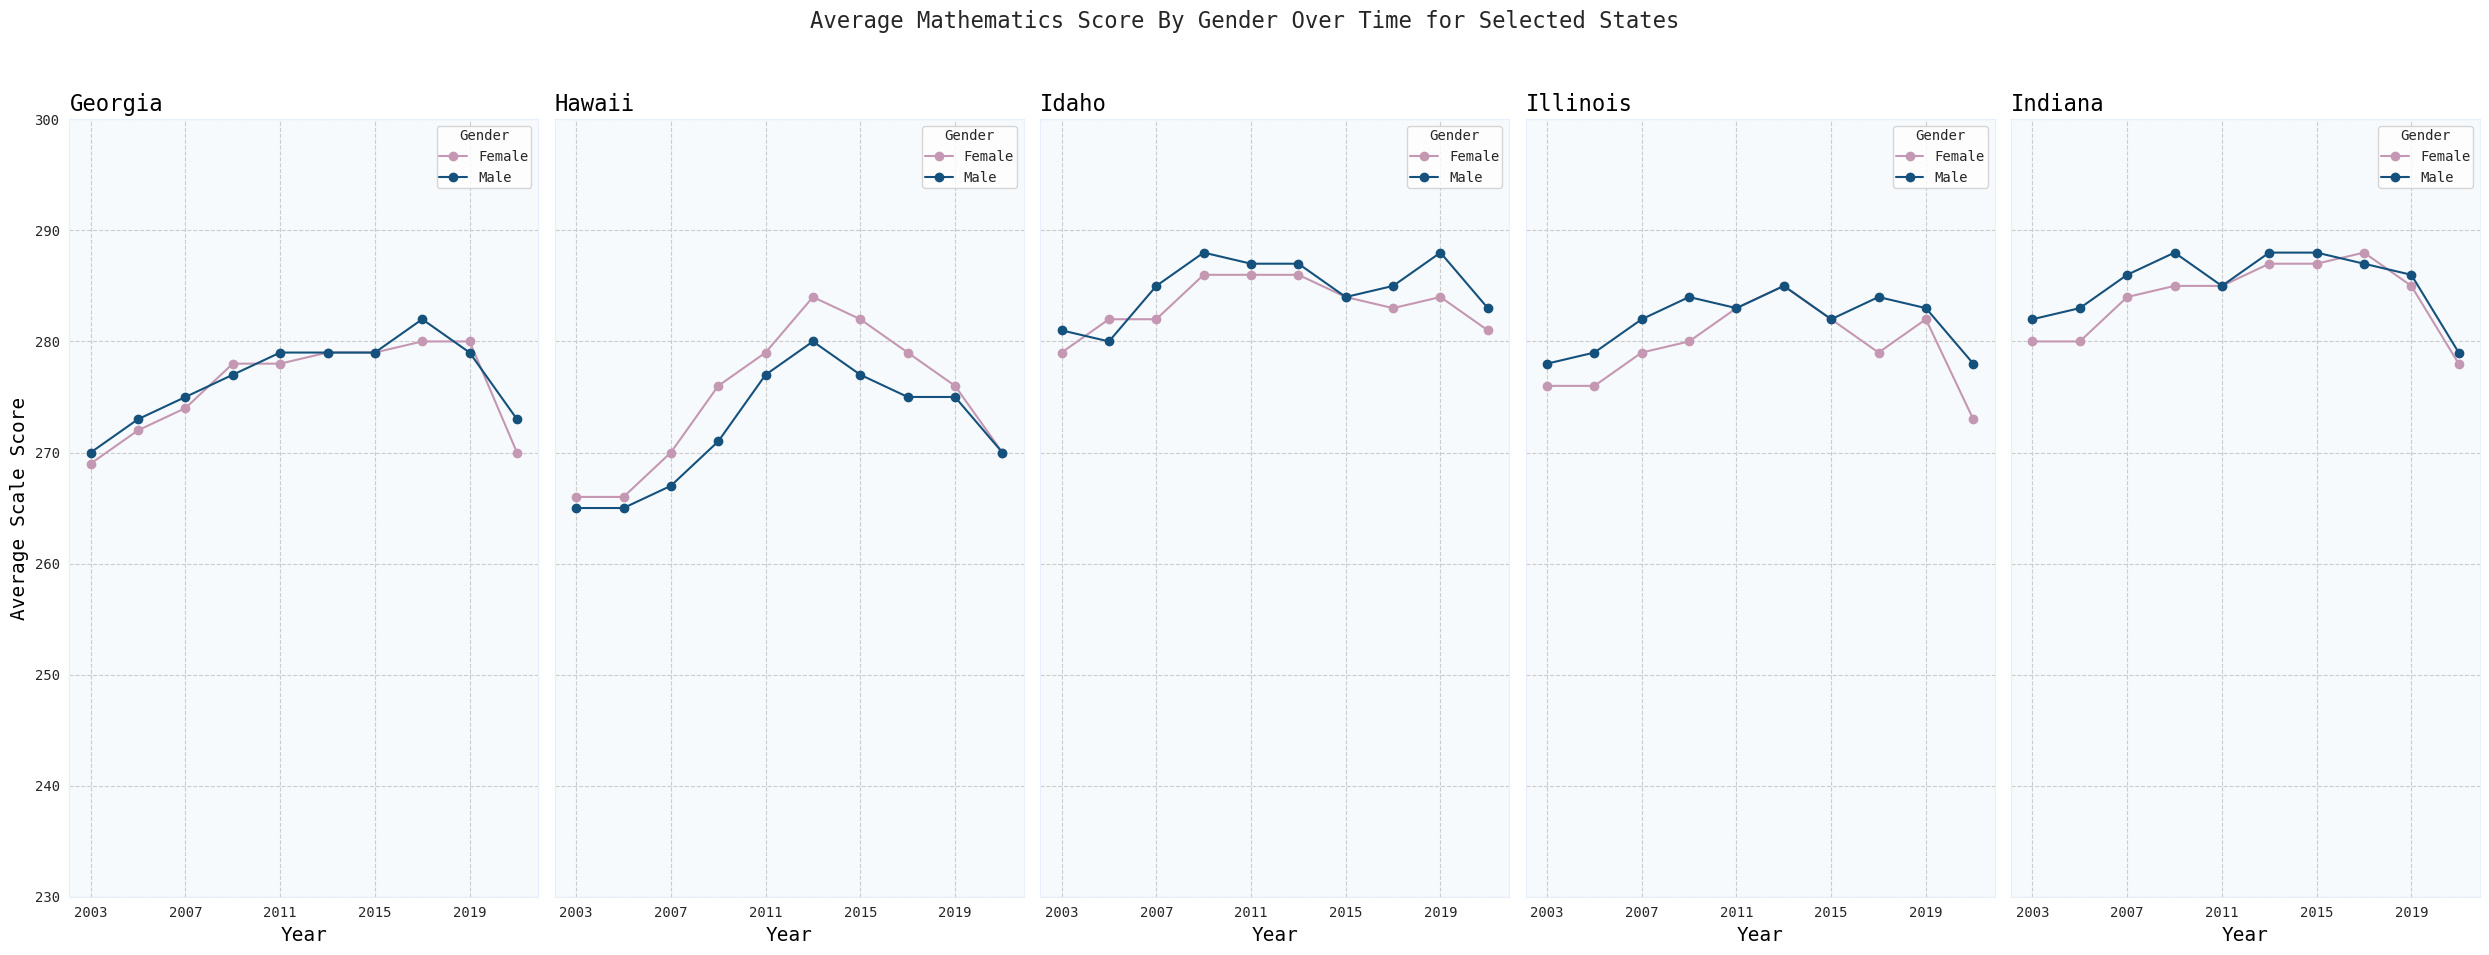

In [86]:
plot(states_3)

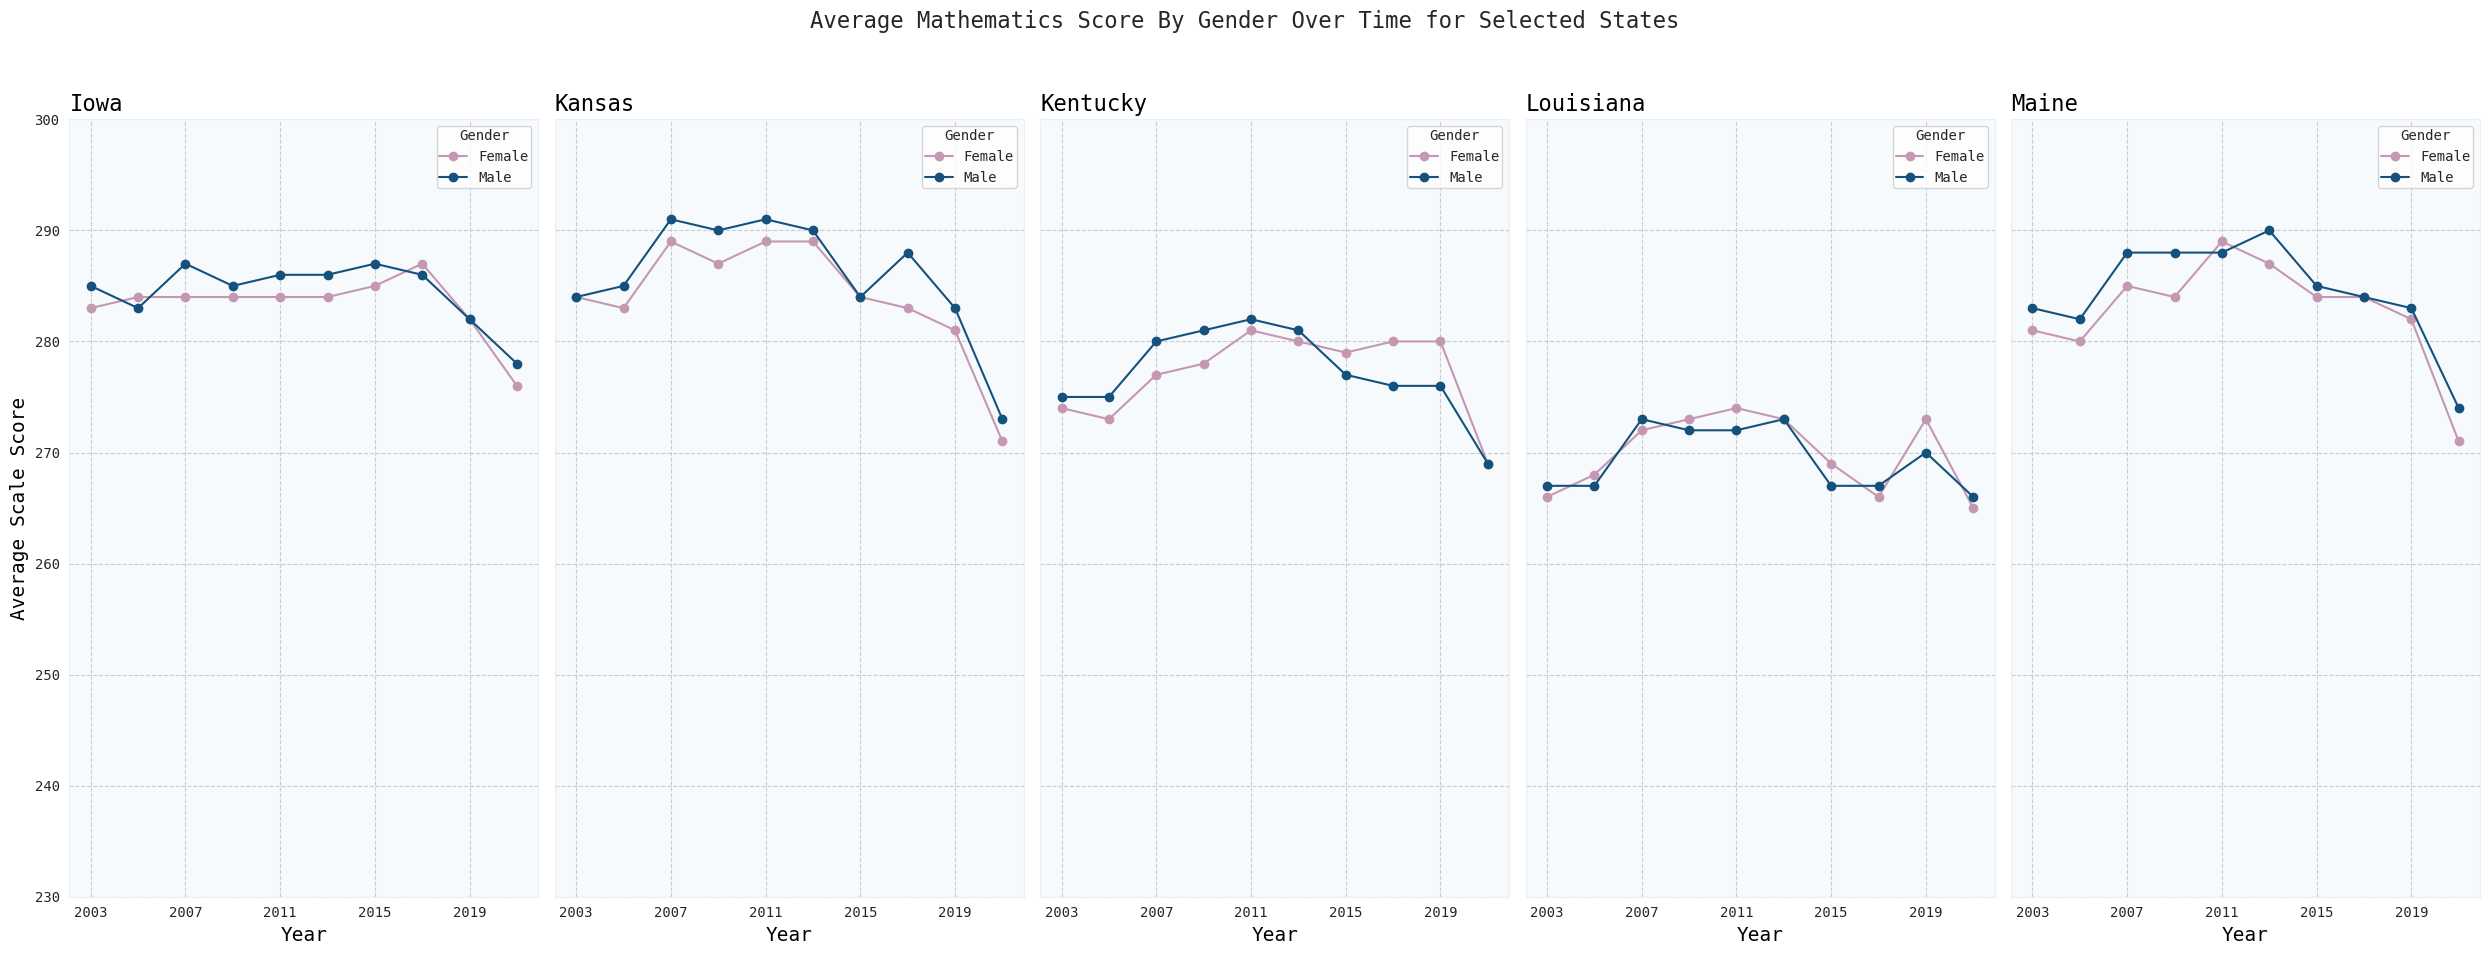

In [87]:
plot(states_4)

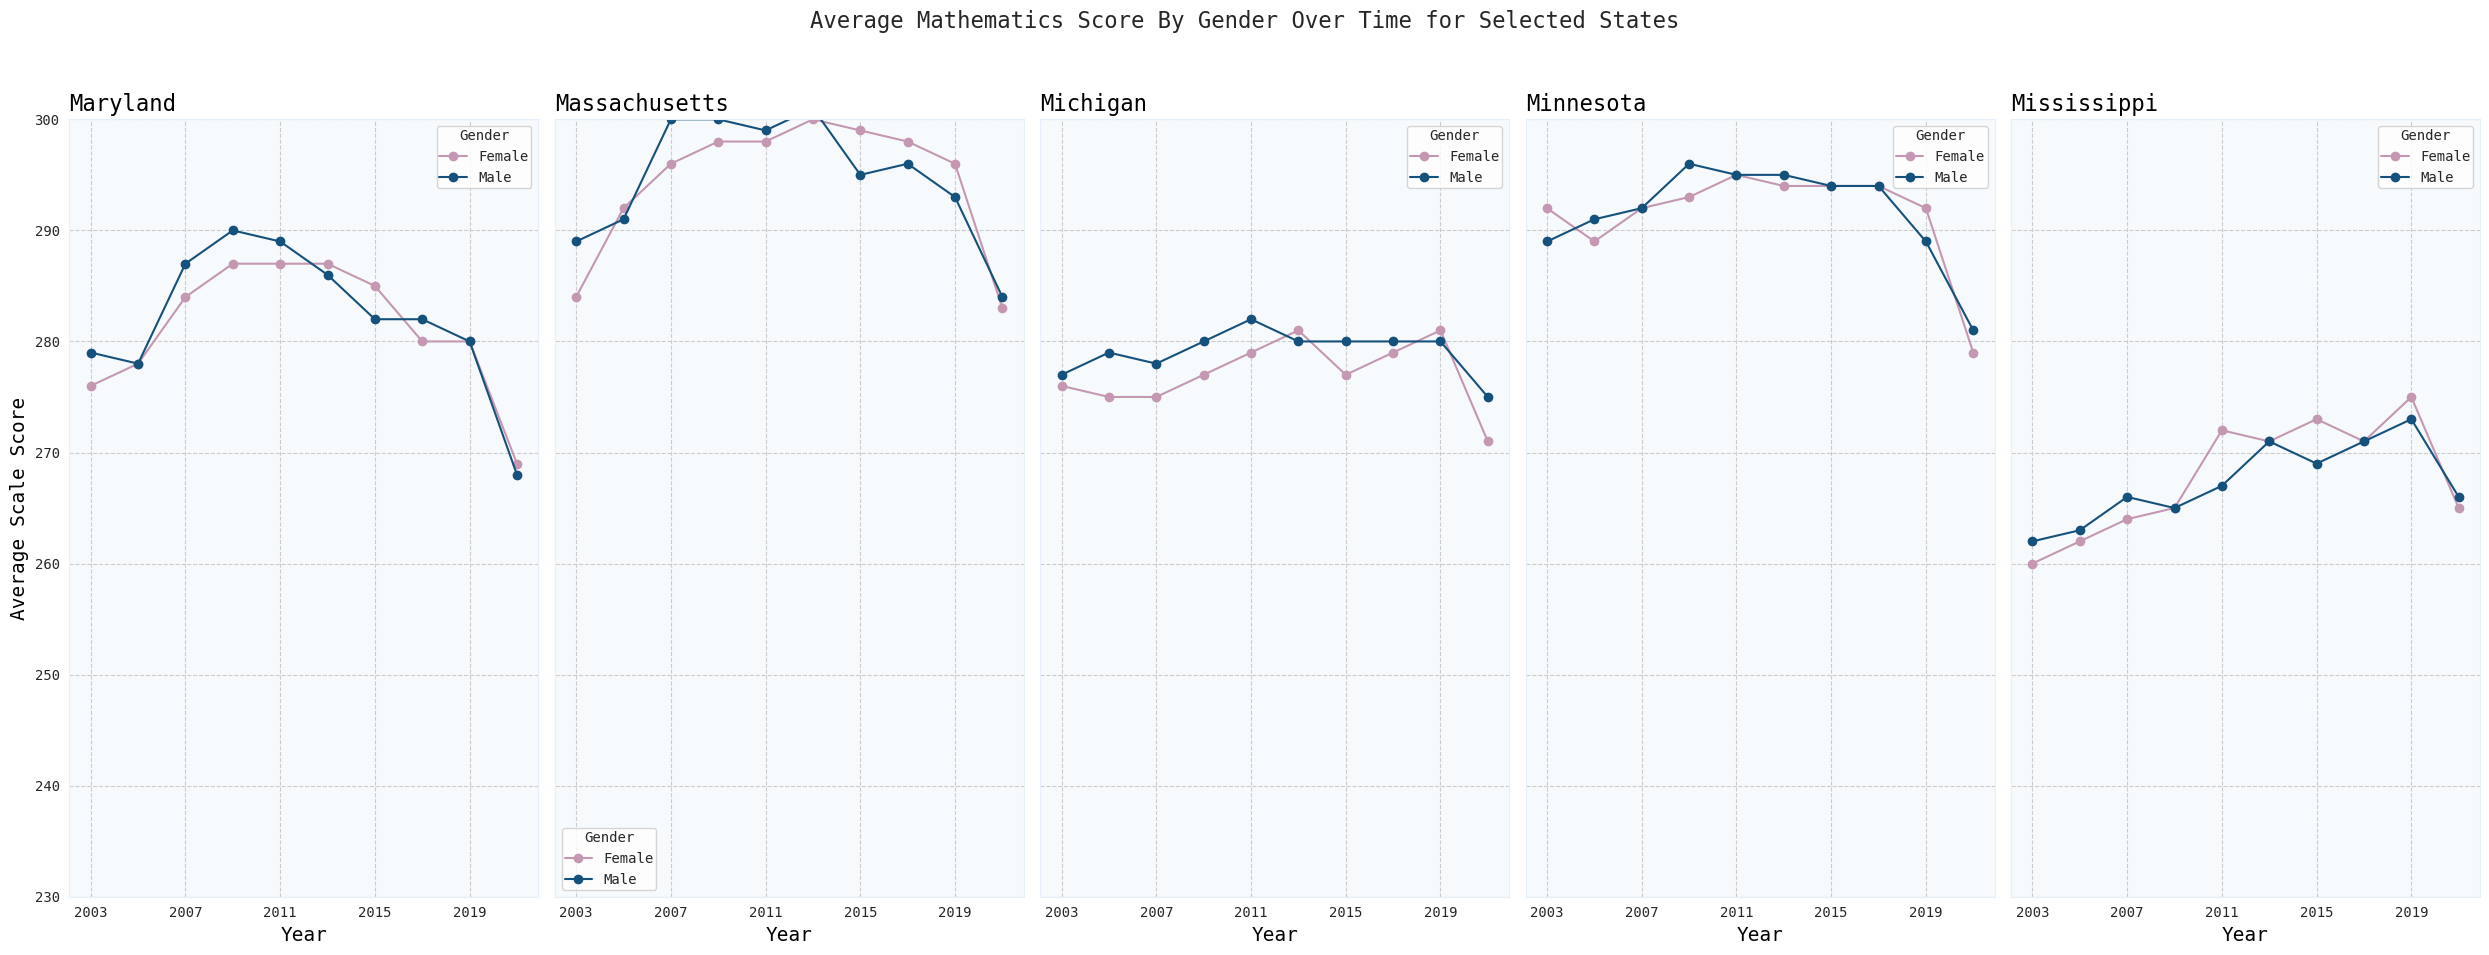

In [88]:
plot(states_5)

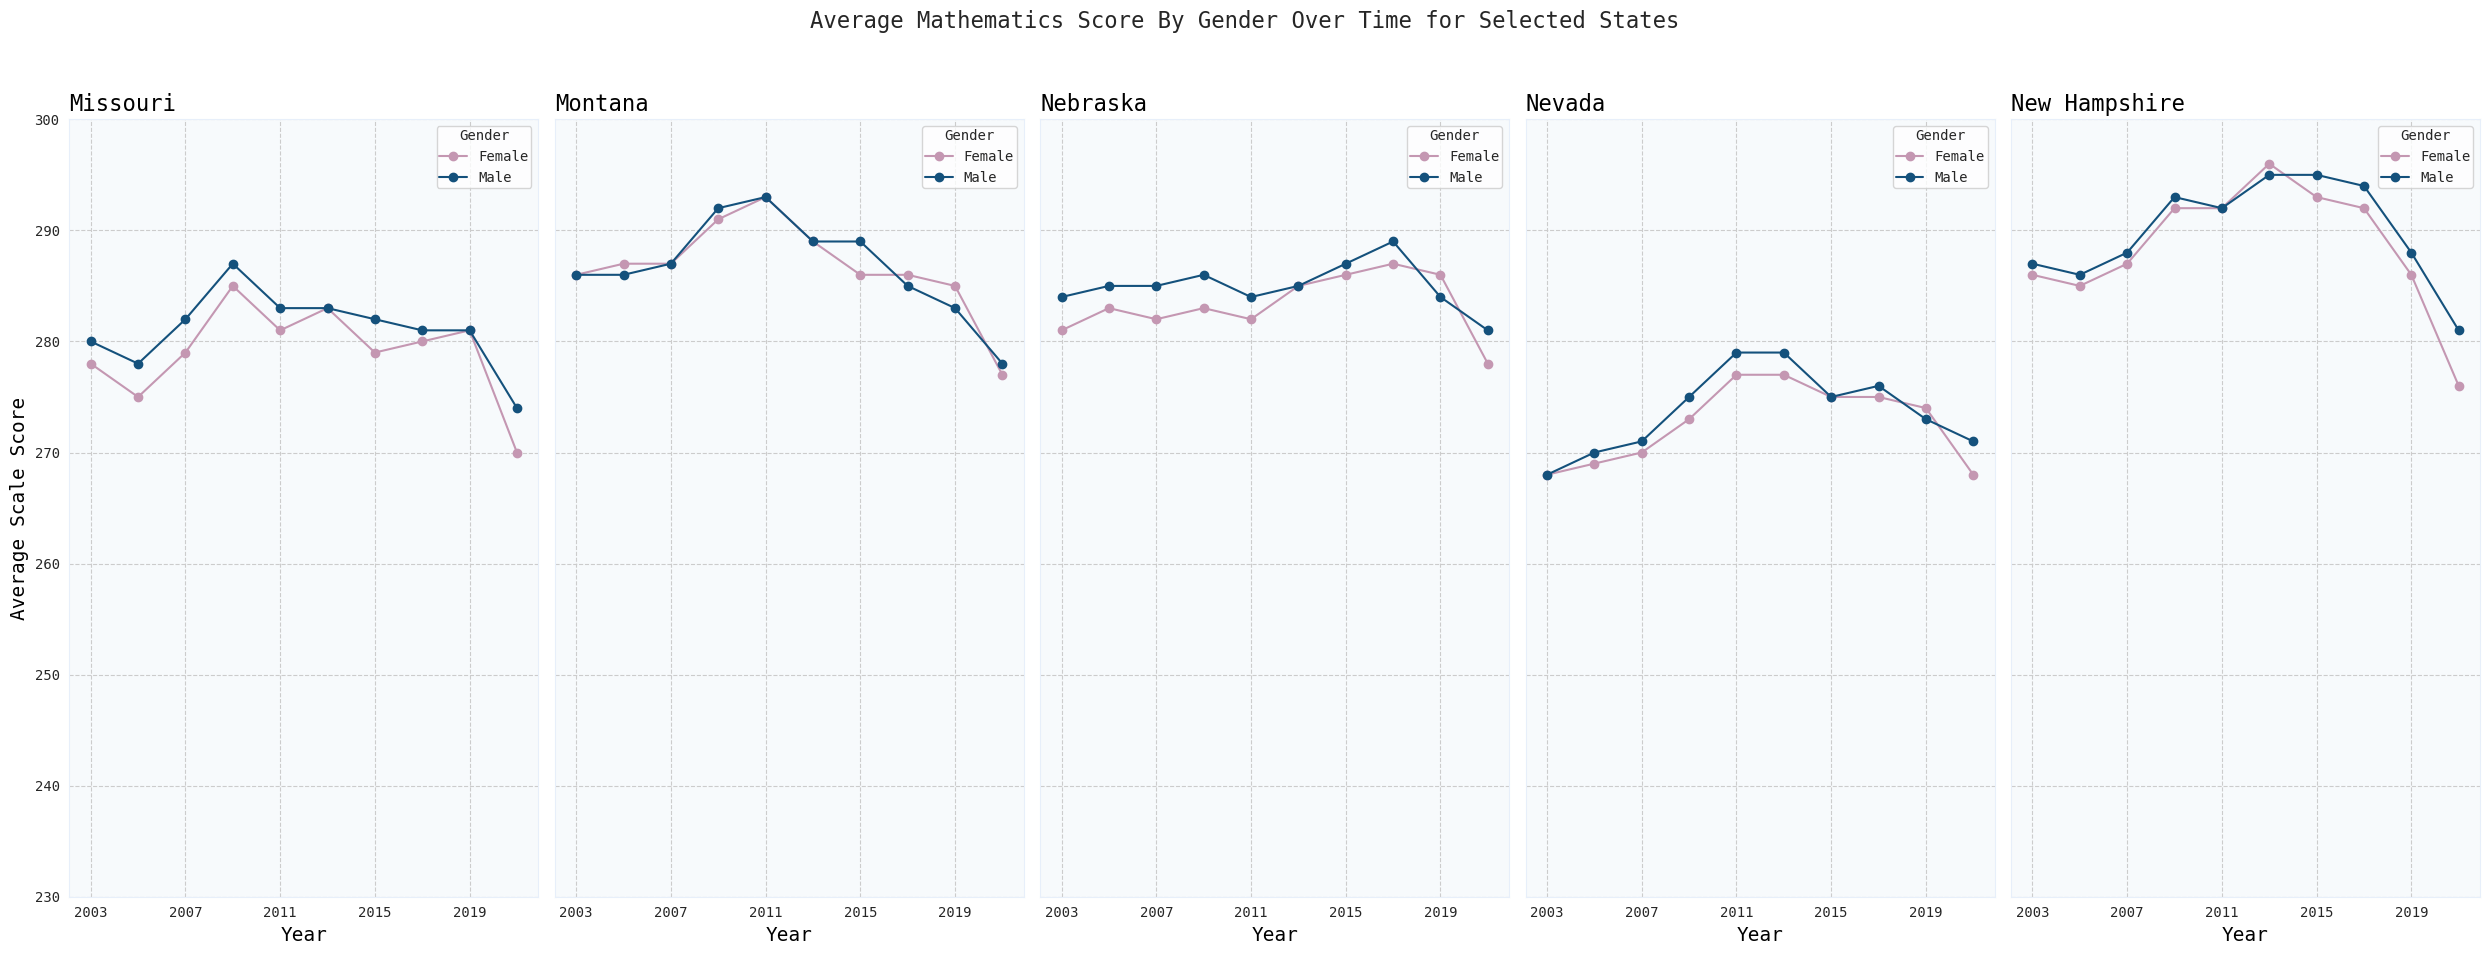

In [89]:
plot(states_6)

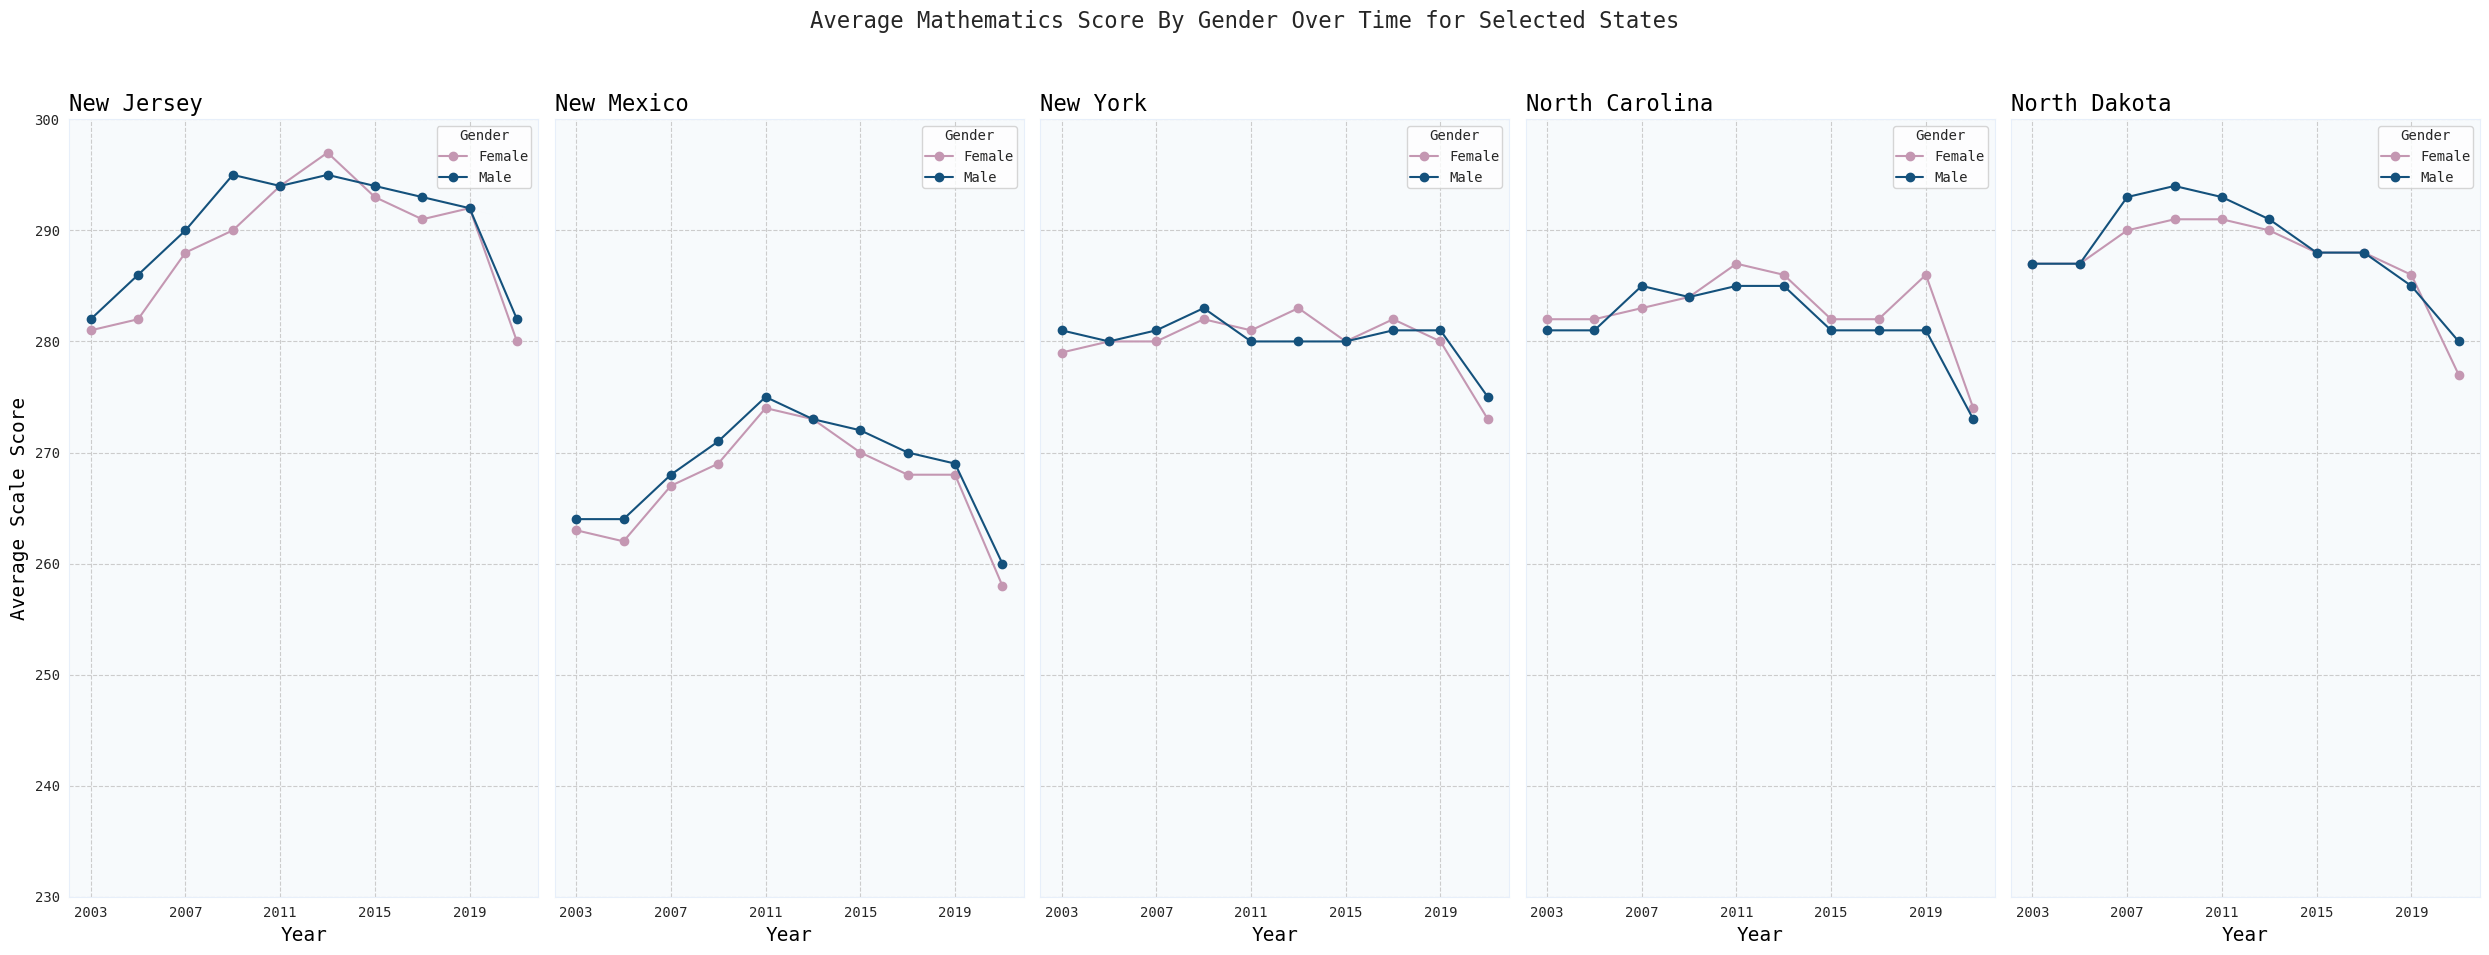

In [90]:
plot(states_7)

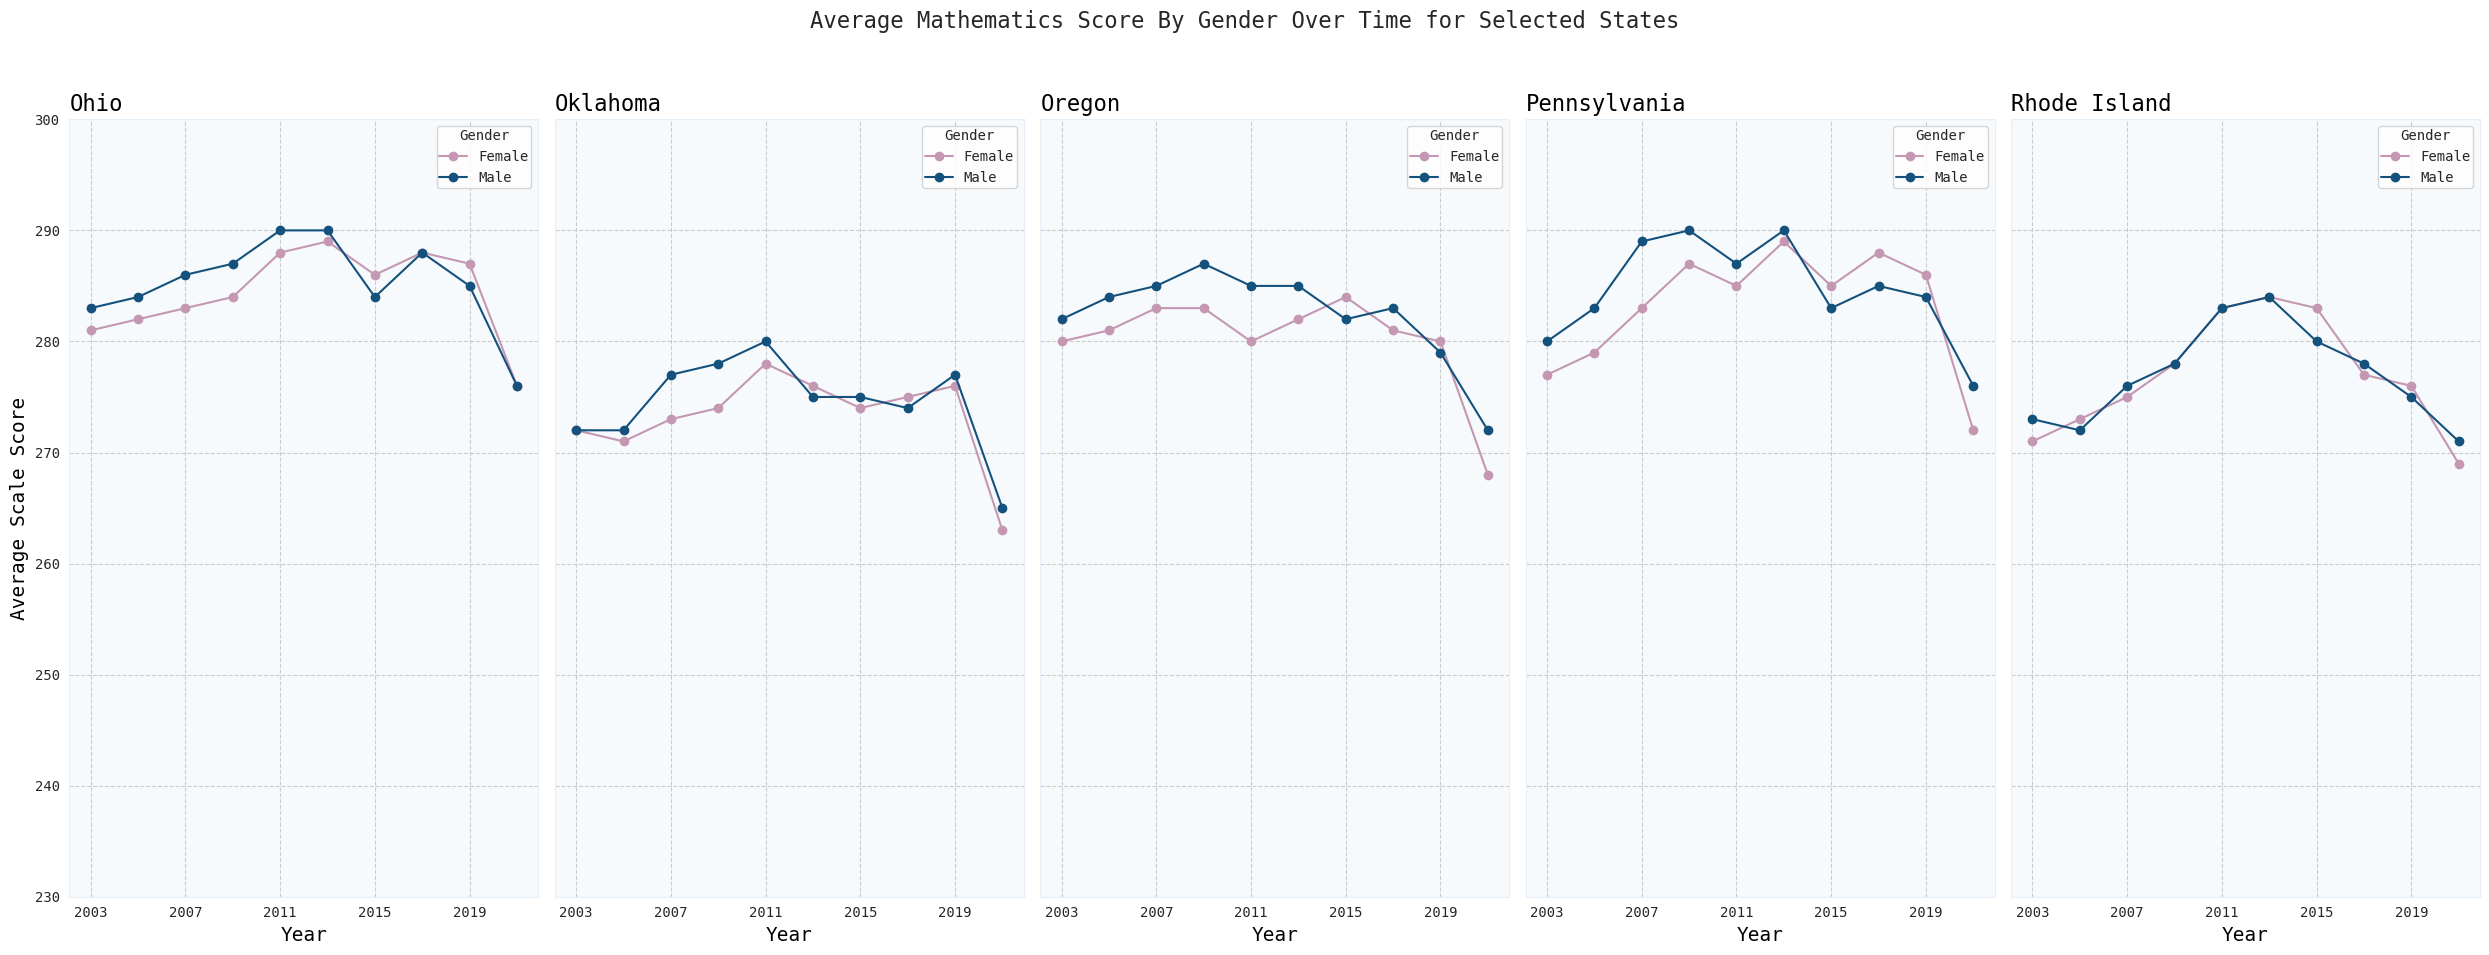

In [91]:
plot(states_8)

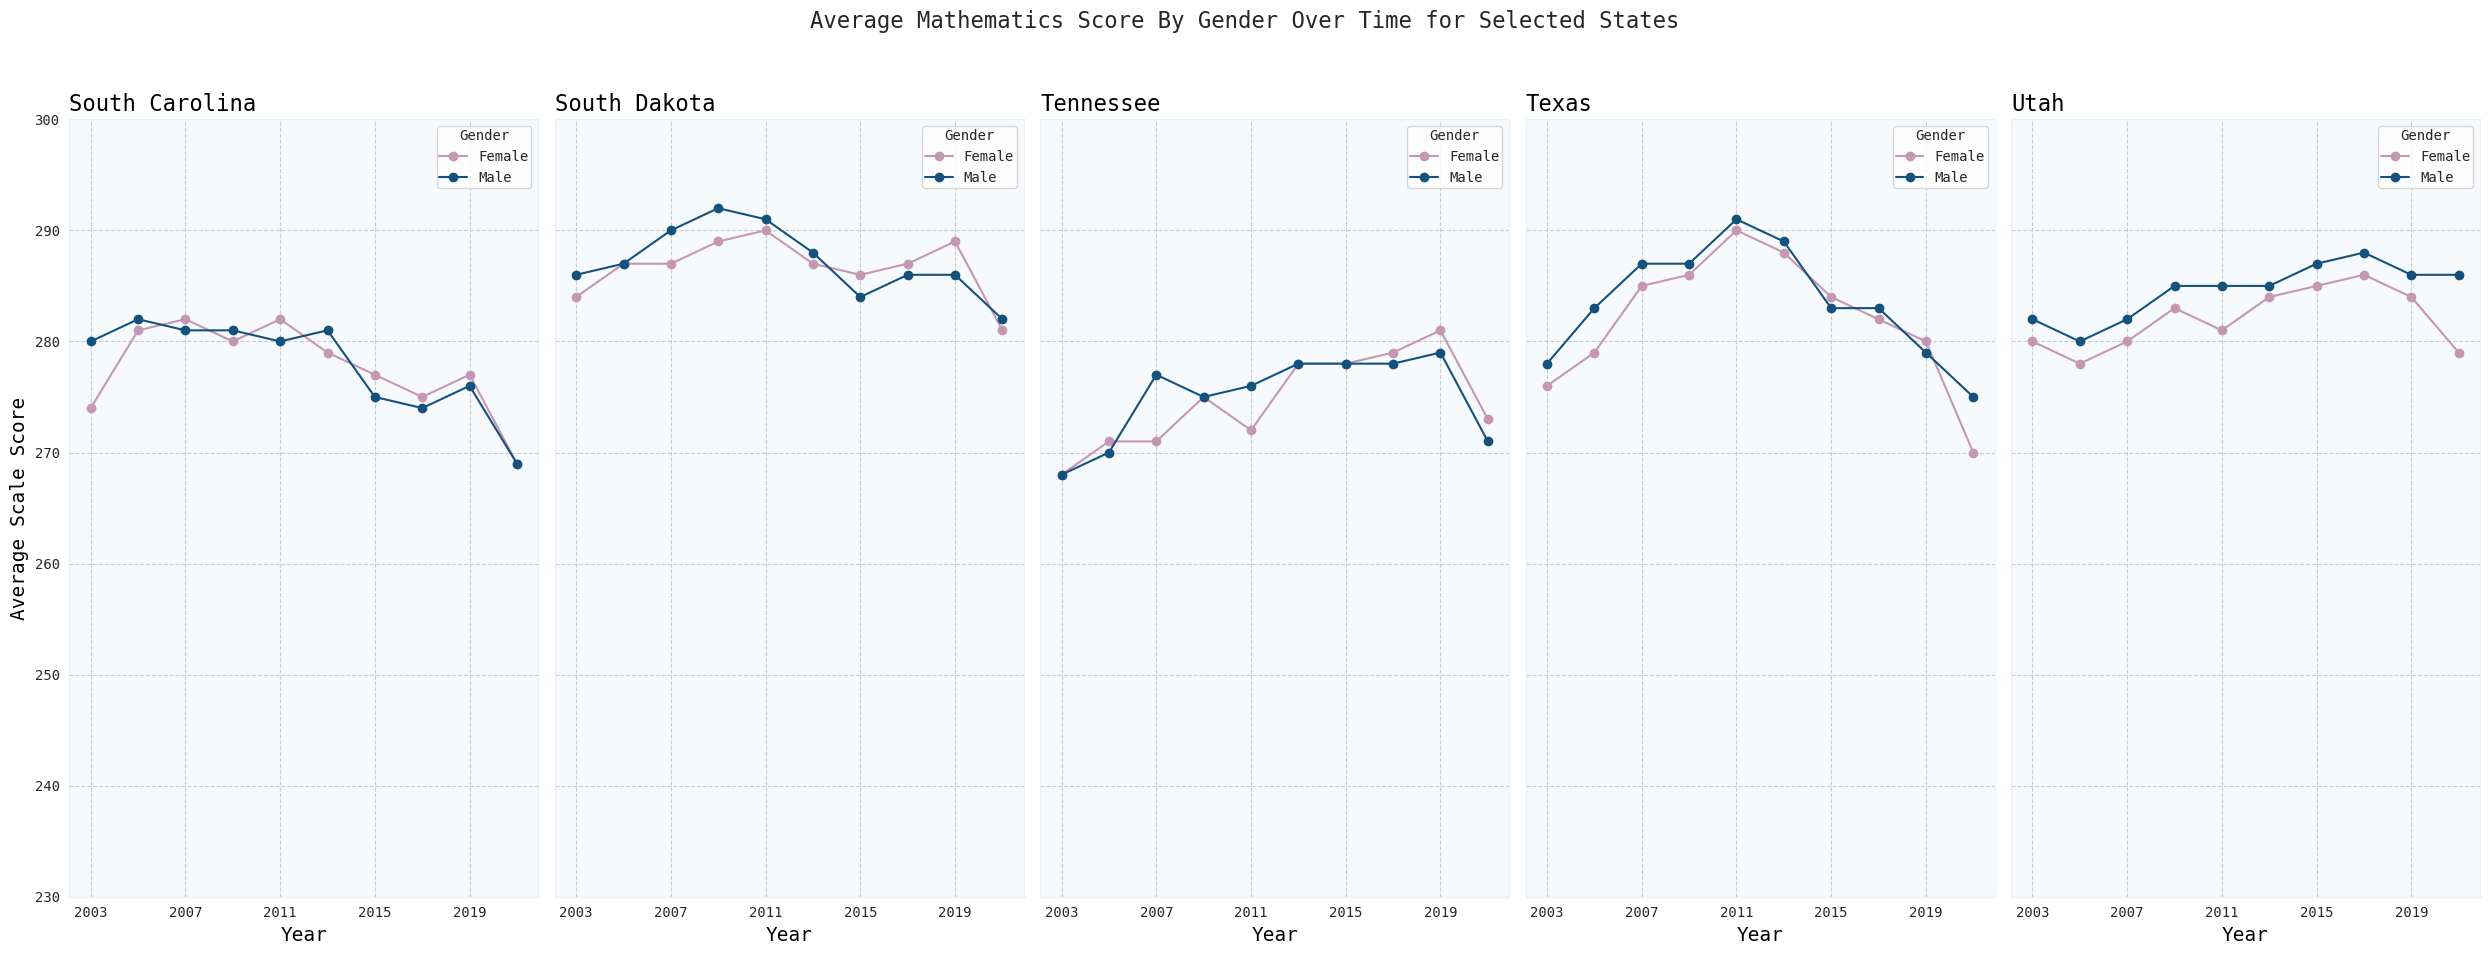

In [92]:
plot(states_9)

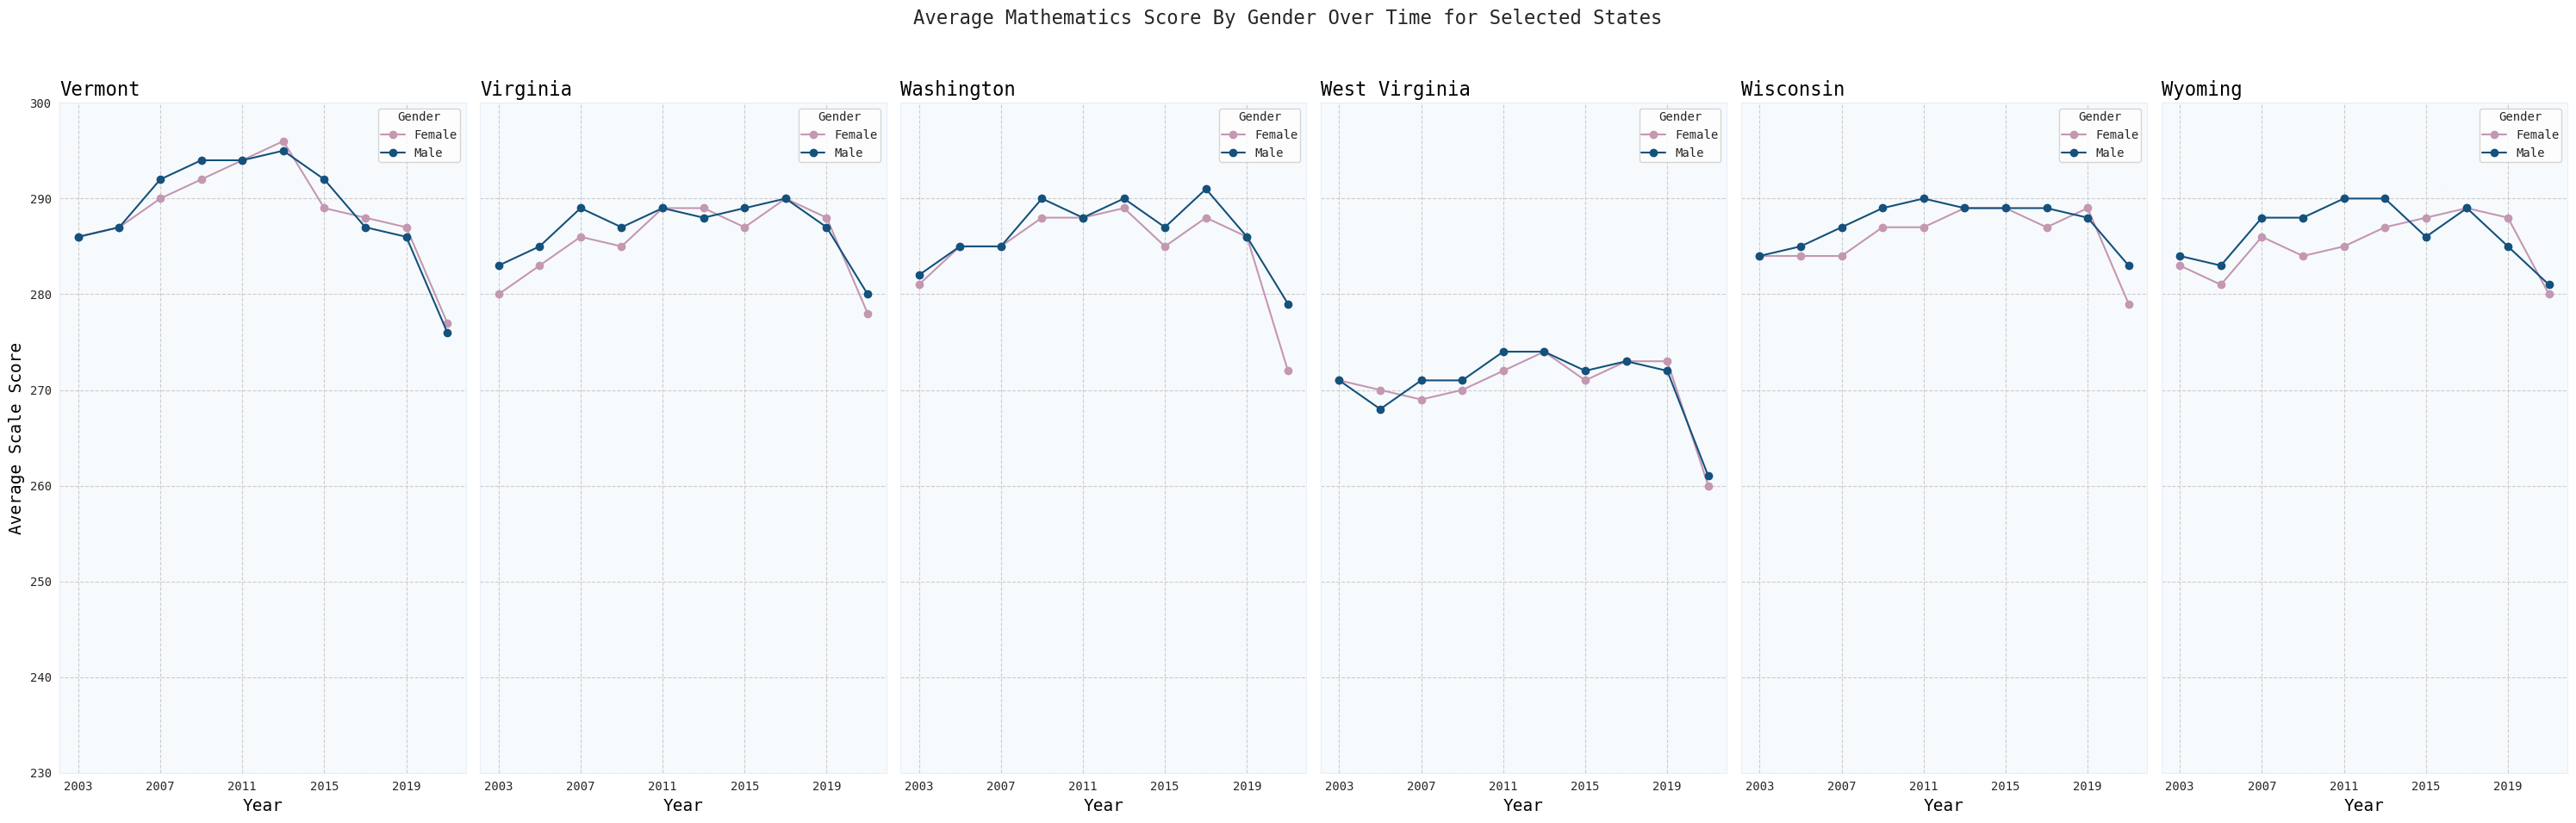

In [93]:
plot(states_10)